In [ ]:
import glob
from IPython.display import Audio
import IPython.display as ipd
import pandas as pd
from tqdm import tqdm
import librosa
from sklearn.model_selection import train_test_split
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score,accuracy_score,roc_auc_score
from tensorflow.keras.utils import to_categorical

In [ ]:
paths=glob.glob('/content/drive/MyDrive/audio set/*')
paths.sort()
paths

['/content/drive/MyDrive/audio set/ping_1.wav',
 '/content/drive/MyDrive/audio set/ping_2.wav',
 '/content/drive/MyDrive/audio set/ping_3.wav',
 '/content/drive/MyDrive/audio set/ping_4.wav',
 '/content/drive/MyDrive/audio set/ping_5.wav',
 '/content/drive/MyDrive/audio set/pong_1.wav',
 '/content/drive/MyDrive/audio set/pong_2.wav',
 '/content/drive/MyDrive/audio set/pong_3.wav',
 '/content/drive/MyDrive/audio set/pong_4.wav',
 '/content/drive/MyDrive/audio set/pong_5.wav']

In [ ]:
Audio(paths[0])

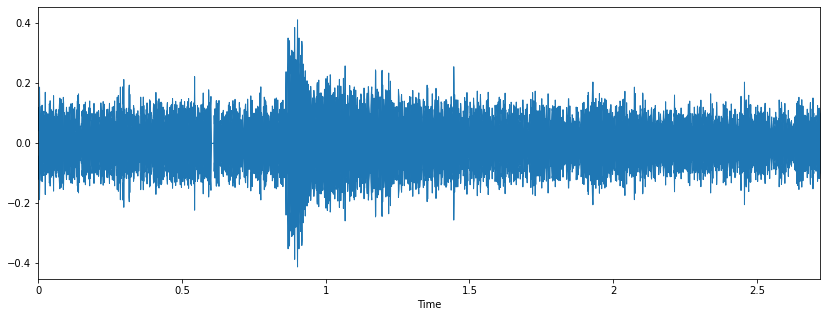

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(paths[0])
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(paths[0])

In [ ]:
sample_rate

22050

In [ ]:
data

array([0.00746112, 0.02090071, 0.03263066, ..., 0.03587815, 0.04744136,
       0.05835405], dtype=float32)

In [ ]:
stftt = librosa.feature.chroma_stft(y=data,sr=sample_rate)
stftt

array([[0.6546556 , 0.9509822 , 0.5530223 , ..., 0.8114445 , 0.9553298 ,
        1.        ],
       [0.89890385, 0.9037069 , 0.5721037 , ..., 0.5182524 , 0.46165994,
        0.6470887 ],
       [1.        , 0.89976156, 0.44129336, ..., 0.673833  , 0.41346002,
        0.45647117],
       ...,
       [0.66261685, 0.8312203 , 0.2320994 , ..., 0.39947087, 0.35282838,
        0.34570384],
       [0.4378497 , 0.7366124 , 0.28732204, ..., 0.44136056, 0.42365977,
        0.5680174 ],
       [0.38653436, 0.59146154, 0.43161422, ..., 0.74151385, 1.        ,
        0.9644394 ]], dtype=float32)

In [ ]:
df = pd.read_csv('metadata.csv')
df

,Audio,Label,Class
0,/content/drive/MyDrive/audio set/ping_1.wav,0,Ping
1,/content/drive/MyDrive/audio set/ping_2.wav,0,Ping
2,/content/drive/MyDrive/audio set/ping_3.wav,0,Ping
3,/content/drive/MyDrive/audio set/ping_4.wav,0,Ping
4,/content/drive/MyDrive/audio set/ping_5.wav,0,Ping
5,/content/drive/MyDrive/audio set/pong_1.wav,1,pong
6,/content/drive/MyDrive/audio set/pong_2.wav,1,pong
7,/content/drive/MyDrive/audio set/pong_3.wav,1,pong
8,/content/drive/MyDrive/audio set/pong_4.wav,1,pong
9,/content/drive/MyDrive/audio set/pong_5.wav,1,pong


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    stftt_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate) 
    stftt_scaled_features = np.mean(stftt_features.T,axis=0)
    
    return stftt_scaled_features

In [ ]:
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = row[0]
    final_class_labels=row[1]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

10it [00:08,  1.19it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.6810925, 0.4964214, 0.5689103, 0.58716655, ...",0
1,"[0.53372043, 0.45491967, 0.42919815, 0.5914417...",0
2,"[0.5646432, 0.44982946, 0.43989953, 0.5874366,...",0
3,"[0.6353603, 0.46881694, 0.42775238, 0.5207734,...",0
4,"[0.6343141, 0.45587558, 0.606629, 0.6279868, 0...",0


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'])
#y = to_categorical(y)

In [ ]:
X.shape

(10, 12)

In [ ]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
X[0]

array([0.6810925 , 0.4964214 , 0.5689103 , 0.58716655, 0.5299026 ,
       0.57654697, 0.5737806 , 0.61275816, 0.47179142, 0.31705135,
       0.41807598, 0.6562108 ], dtype=float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7, 12)
(7,)
(3, 12)
(3,)


**model creation**

In [ ]:
batch_size=132
num_labels = y.shape[0]

In [ ]:
model=Sequential()

model.add(Dense(128, activation='tanh', input_shape=(12,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='mean_squared_error',metrics=['binary_accuracy'],optimizer=RMSprop(0.001))

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=50 , verbose=2)

Epoch 1/50
1/1 - 1s - loss: 0.2475 - binary_accuracy: 0.4286
Epoch 2/50
1/1 - 0s - loss: 0.2869 - binary_accuracy: 0.5714
Epoch 3/50
1/1 - 0s - loss: 0.2158 - binary_accuracy: 0.5714
Epoch 4/50
1/1 - 0s - loss: 0.2021 - binary_accuracy: 0.8571
Epoch 5/50
1/1 - 0s - loss: 0.1912 - binary_accuracy: 0.8571
Epoch 6/50
1/1 - 0s - loss: 0.2034 - binary_accuracy: 0.5714
Epoch 7/50
1/1 - 0s - loss: 0.2254 - binary_accuracy: 0.4286
Epoch 8/50
1/1 - 0s - loss: 0.2003 - binary_accuracy: 0.5714
Epoch 9/50
1/1 - 0s - loss: 0.1692 - binary_accuracy: 0.8571
Epoch 10/50
1/1 - 0s - loss: 0.1619 - binary_accuracy: 0.8571
Epoch 11/50
1/1 - 0s - loss: 0.1563 - binary_accuracy: 0.8571
Epoch 12/50
1/1 - 0s - loss: 0.1557 - binary_accuracy: 0.8571
Epoch 13/50
1/1 - 0s - loss: 0.1525 - binary_accuracy: 0.8571
Epoch 14/50
1/1 - 0s - loss: 0.1544 - binary_accuracy: 0.7143
Epoch 15/50
1/1 - 0s - loss: 0.1418 - binary_accuracy: 0.8571
Epoch 16/50
1/1 - 0s - loss: 0.1394 - binary_accuracy: 0.8571
Epoch 17/50
1/1 -

In [ ]:
score=model.evaluate(X_test,y_test)
print("loss ", score[0])
print("accuracy  ",score[1])

1/1 [==============================] - 0s 118ms/step - loss: 0.2682 - binary_accuracy: 0.6667
loss  0.2681797742843628
accuracy   0.6666666865348816


In [ ]:
y_test

array([0, 1, 0])

In [ ]:
y_pred = model.predict(X_test).round()
#ui=((y_pred>0.5)*1)
y_pred

array([[0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)*1
y_pred

array([[1, 0],
       [0, 1],
       [0, 1]])

In [ ]:
print("LoR Accuracy   ",accuracy_score(y_test,y_pred))
print("LoR Precision  ",precision_score(y_test,y_pred))
print("LoR Recall     ",recall_score(y_test,y_pred))
print("LoR AUC        ",roc_auc_score(y_test,y_pred))

ValueError: ignored